In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.info() 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   object 
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   object 
 6   work_type          3425 non-null   object 
 7   Residence_type     3425 non-null   object 
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   object 
 11  stroke             3425 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 321.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,37333.512117,48.652555,0.119124,0.060146,108.311670,30.292350,0.052555
std,21050.593185,18.850018,0.323982,0.237792,47.706754,7.295778,0.223175
min,84.000000,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,18986.000000,34.000000,0.000000,0.000000,77.230000,25.300000,0.000000
50%,38067.000000,50.000000,0.000000,0.000000,92.350000,29.100000,0.000000
75%,55459.000000,63.000000,0.000000,0.000000,116.200000,34.100000,0.000000
max,72915.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [4]:
data = data.dropna() 
data = pd.get_dummies(data, drop_first=True)

In [5]:
X = data.drop('stroke', axis=1)  # Features (assuming 'stroke' is the target variable)
y = data['stroke']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Initialize the model with desired hyperparameters
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.94
Confusion Matrix:
[[964   5]
 [ 59   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       969
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1028
   macro avg       0.47      0.50      0.48      1028
weighted avg       0.89      0.94      0.91      1028



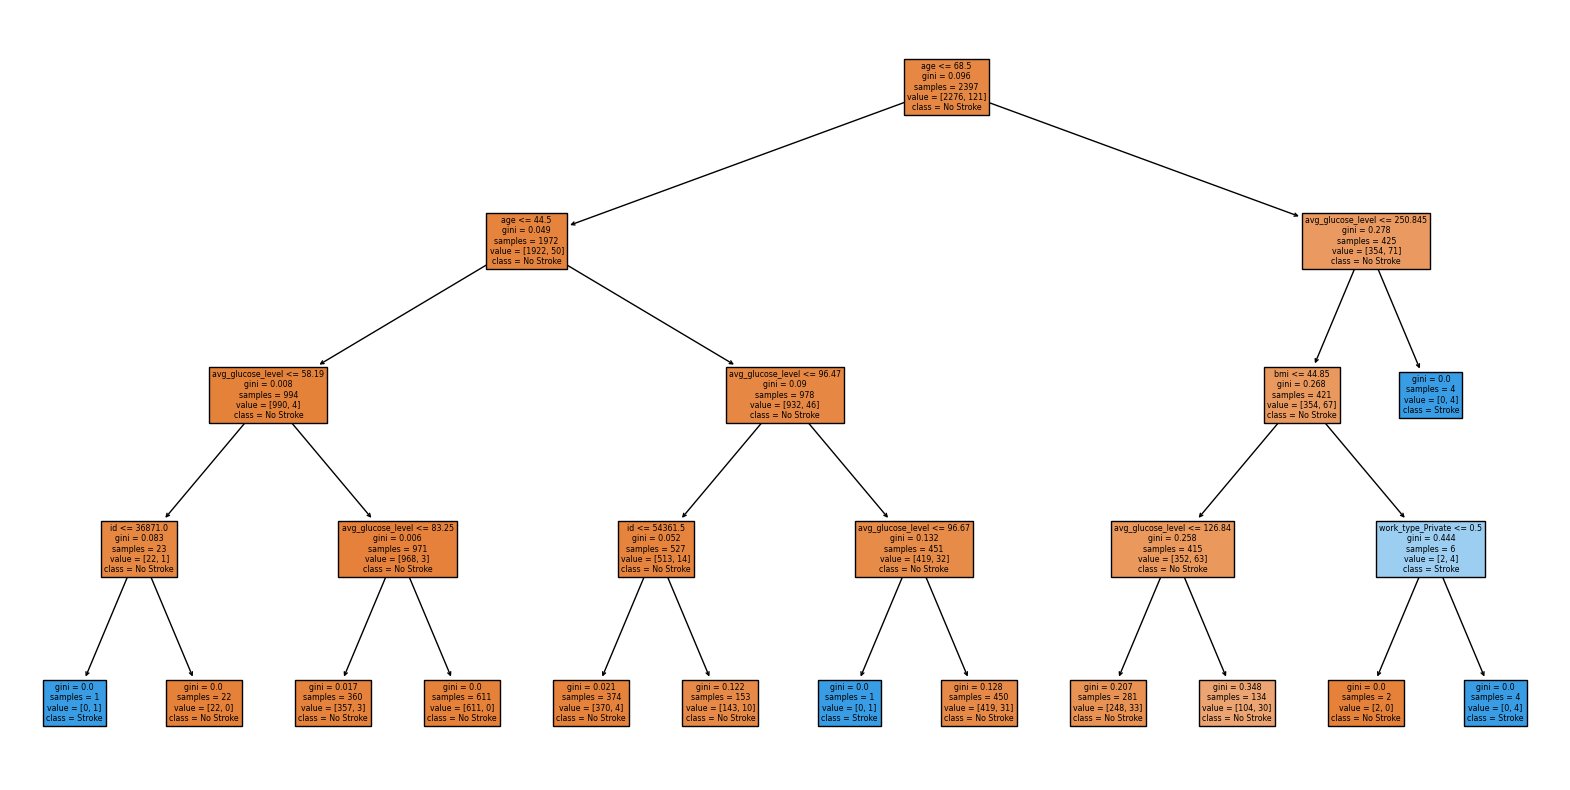

In [11]:
# Convert the Index object to a list
feature_names = X.columns.tolist()

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['No Stroke', 'Stroke'])
plt.show()